#Machine Learning Assignment

#Read and show the file

In [1]:
import pandas as pd

In [6]:
std_per=pd.read_csv(r"C:\Users\abdal\Downloads\Student_Performance.csv")

In [7]:
std_per.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
std_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
std_per.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
std_per['Performance Index'].value_counts().sort_index()

,count
Performance Index,
10.0,1
11.0,5
12.0,8
13.0,13
14.0,7
...,...
96.0,14
97.0,13
98.0,7


In [7]:
std_per[std_per['Performance Index']>=50]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
...,...,...,...,...,...,...
9993,9,58,Yes,7,7,55.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


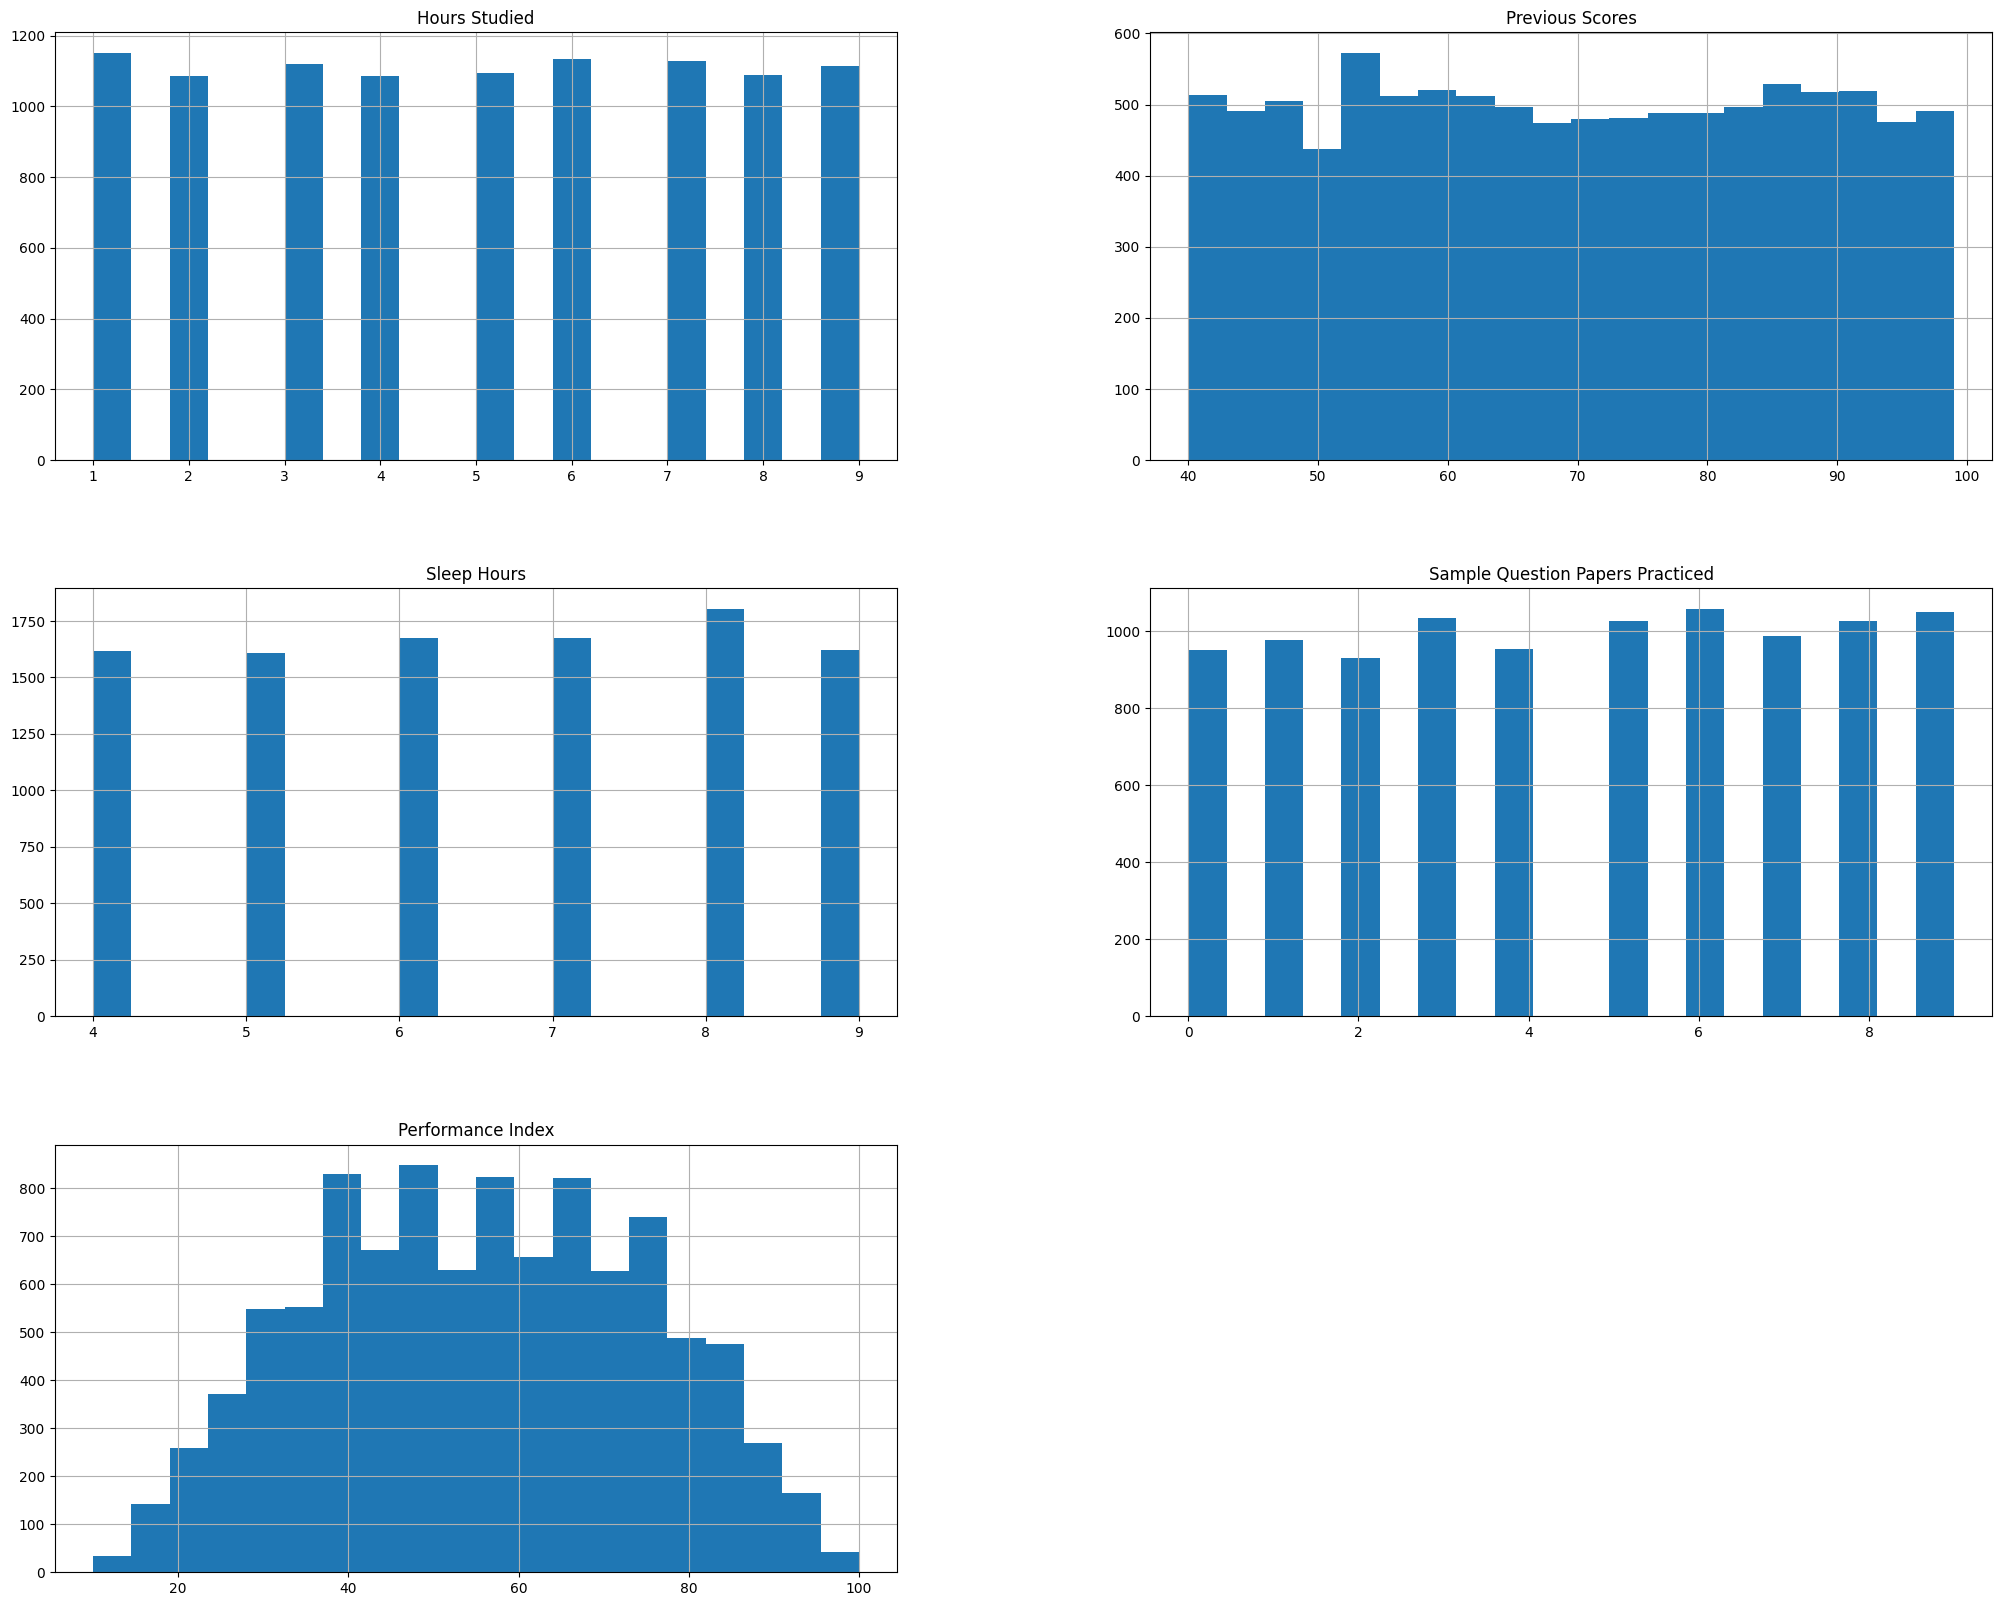

In [8]:
import matplotlib.pyplot as plt
std_per.hist(bins=20, figsize=(25,20));

In [9]:
std_per

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#Dividing the data into train set and test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(std_per, test_size=0.2, random_state=23)

In [12]:
train_set.shape

(8000, 6)

In [13]:
test_set.shape

(2000, 6)

#Now we want to work on the train set so.... we take a copy of the train set

In [14]:
std_per=train_set.copy()
std_per

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
52,6,81,No,9,9,75.0
4720,6,93,Yes,5,7,82.0
1448,1,42,No,5,6,14.0
9354,8,42,Yes,5,0,32.0
8123,4,54,No,8,5,35.0
...,...,...,...,...,...,...
347,8,66,Yes,7,7,64.0
6175,9,46,Yes,7,8,44.0
9704,2,90,No,6,0,66.0
9256,6,60,No,6,1,47.0


#Let's make correlations

In [15]:
std_per.dtypes
# Now we have to remove the any columns that doesn't contain numbers to make the correlation

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [16]:
std_corr=std_per.drop(columns=['Extracurricular Activities']).corr()
std_corr
# There is a big correlation between
# previous Scores and performance Index,that leads us to most of students Keep up the performance
#  Hours Studied and Performance Index, students whose have high hours study get high mark

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.013211,-0.002481,0.023201,0.373350
Previous Scores,-0.013211,1.000000,0.013378,0.010286,0.915080
Sleep Hours,-0.002481,0.013378,1.000000,-0.003148,0.052776
Sample Question Papers Practiced,0.023201,0.010286,-0.003148,1.000000,0.046537
Performance Index,0.373350,0.915080,0.052776,0.046537,1.000000


Feature engineering to extract new columns

In [17]:
std_per['Hours_performance']=std_per['Hours Studied']/std_per['Performance Index']
std_per['hour_sleep_study']=std_per['Sleep Hours']/std_per['Hours Studied']

In [18]:
std_corr=std_per.drop(columns=['Extracurricular Activities']).corr()
std_corr

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Hours_performance,hour_sleep_study
Hours Studied,1.000000,-0.013211,-0.002481,0.023201,0.373350,0.720327,-0.765867
Previous Scores,-0.013211,1.000000,0.013378,0.010286,0.915080,-0.628807,0.008278
Sleep Hours,-0.002481,0.013378,1.000000,-0.003148,0.052776,-0.039686,0.285413
Sample Question Papers Practiced,0.023201,0.010286,-0.003148,1.000000,0.046537,-0.011793,-0.008720
Performance Index,0.373350,0.915080,0.052776,0.046537,1.000000,-0.312447,-0.275457
Hours_performance,0.720327,-0.628807,-0.039686,-0.011793,-0.312447,1.000000,-0.606304
hour_sleep_study,-0.765867,0.008278,0.285413,-0.008720,-0.275457,-0.606304,1.000000


#Now  prepare The Data for the ML

In [19]:
std_per=train_set.drop(columns=['Performance Index'])
std_labels=train_set['Performance Index'].copy()
# We want the model to predict the performance index so we remove it from the training set.

In [20]:
std_labels

,Performance Index
52,75.0
4720,82.0
1448,14.0
9354,32.0
8123,35.0
...,...
347,64.0
6175,44.0
9704,66.0
9256,47.0


Handling null values

In [21]:
std_per.isnull().sum()
## There are no null values so we don't have to handle null values

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0


Now we want to make Label encoding for non numerical columns

In [22]:
std_ext=std_per[['Extracurricular Activities']]
std_ext

,Extracurricular Activities
52,No
4720,Yes
1448,No
9354,Yes
8123,No
...,...
347,Yes
6175,Yes
9704,No
9256,No


In [23]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
std_per['Ex Activities']=ordinal_encoder.fit_transform(std_ext)
# Here I make label encoding to tranform the non numerical column like Extracurricular Activities to 0 and 1.
# 0 mean No AND 1 mean Yes

In [24]:
std_per.drop('Extracurricular Activities',axis=1,inplace=True)
# Now drop the non numerical column since you made the Label Encoding

In [25]:
std_per

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Ex Activities
52,6,81,9,9,0.0
4720,6,93,5,7,1.0
1448,1,42,5,6,0.0
9354,8,42,5,0,1.0
8123,4,54,8,5,0.0
...,...,...,...,...,...
347,8,66,7,7,1.0
6175,9,46,7,8,1.0
9704,2,90,6,0,0.0
9256,6,60,6,1,0.0


In [26]:
std_train_prepared=std_per.copy()

Now The Standardization process

In [27]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std_train_prepared=std.fit_transform(std_train_prepared.values)


In [28]:
# Since The std_train_prepared converted to array so we can also return it to data frame
pd.DataFrame(std_train_prepared,columns=std_per.columns,index=std_per.index)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Ex Activities
52,0.372661,0.671995,1.449438,1.537742,-0.982159
4720,0.372661,1.364542,-0.905099,0.839106,1.018165
1448,-1.554479,-1.578785,-0.905099,0.489788,-0.982159
9354,1.143516,-1.578785,-0.905099,-1.606121,1.018165
8123,-0.398195,-0.886237,0.860804,0.140470,-0.982159
...,...,...,...,...,...
347,1.143516,-0.193690,0.272170,0.839106,1.018165
6175,1.528944,-1.347936,0.272170,1.188424,1.018165
9704,-1.169051,1.191406,-0.316464,-1.606121,-0.982159
9256,0.372661,-0.539964,-0.316464,-1.256803,-0.982159


# Let's build The model and predict

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(std_train_prepared,std_labels)
# Now train the model on the prepared training set

LinearRegression()

Now Test the model on the test set but first prepare the test set.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
std_test_prepared=test_set.copy()
std_test_prepared=test_set.drop(columns=['Performance Index'])
test_labels=test_set['Performance Index'].copy()
data_pipeline = Pipeline([

        ('oridanal_encoder', OrdinalEncoder()),
        ('std_scaler', StandardScaler()),
    ])

std_test_prepared = data_pipeline.fit_transform(std_test_prepared.values)
# Here I implement test set into pipeline to transform the data

In [31]:
len(std_test_prepared)

2000

Use the trained model to generate predictions on the test set.

In [32]:
predictions=lin_reg.predict(std_test_prepared)

In [33]:
labels=test_labels.values

In [34]:
predictions,labels

# We can see the predictions and the targets are so close , so thats so good

(array([88.24762317, 62.66179382, 70.1182736 , ..., 47.59889751,
        52.52218557, 52.67521878]),
 array([88., 65., 68., ..., 48., 51., 53.]))

Now to extract the mean absolute error

In [35]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(predictions,labels)
mae
# Here is the error margin of the model

1.6805289412633468

#To evalute the model using cross validation

In [36]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg,std_test_prepared, test_labels,
                         scoring="neg_mean_absolute_error", cv=10)
scores_s = np.sqrt(-scores)

In [37]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores_s)

## The numbers seems close to each other thats leads us that the data distribution very good

Scores: [1.25140153 1.25490424 1.33350925 1.25353856 1.23823726 1.25621145
 1.26718744 1.22105099 1.30330843 1.26279658]
Mean: 1.2642145704451064
Standard deviation: 0.030508571746986006


#Making Grid Search to improve the MAE

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'fit_intercept':[True,False], 'copy_X': [True,False],'n_jobs':[None],'positive':[True,False]},
  ]
lin_reg = LinearRegression()
grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(std_train_prepared, std_labels)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'copy_X': [True, False],
                          'fit_intercept': [True, False], 'n_jobs': [None],
                          'positive': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best=grid_search.best_params_
best

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}

Here to rebuild the model using the best hyperparmeter

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg_imp=LinearRegression(**best)
lin_reg_imp.fit(std_train_prepared,std_labels)
# To train tht model on the best parameters

LinearRegression(positive=True)

predict again with the test set

In [41]:
predictions=lin_reg_imp.predict(std_test_prepared)

In [42]:
labels=test_labels.values

In [43]:
predictions,labels
# Here you can see there's no difference between this result and the past result because Linear regression model has only 4 parameters

(array([88.24762317, 62.66179382, 70.1182736 , ..., 47.59889751,
        52.52218557, 52.67521878]),
 array([88., 65., 68., ..., 48., 51., 53.]))

Here you can see that the mean abosulte error doesn't change

In [44]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(predictions,labels)
mae

1.6805289412633484

In [45]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg_imp,std_test_prepared, test_labels,
                         scoring="neg_mean_absolute_error", cv=10)
scores_s = np.sqrt(-scores)

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores_s)

Scores: [1.25140153 1.25490424 1.33350925 1.25353856 1.23823726 1.25621145
 1.26718744 1.22105099 1.30330843 1.26279658]
Mean: 1.2642145704451064
Standard deviation: 0.030508571746985867
